# Clustering - Customer Segmentaiton
## Part 1. Data Wrangling - Transaction Level

<br id = 'toc'></br>
**Table of Contents**
1. [EDA + Data Cleaning + Feature Engineering at transaction level](#tx)
    1. [Categorical features](#cat-tx)
    2. [Numerical features](#num-tx)

In [52]:
# load libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import os
import datetime

<a id='tx'></a>
### 1. EDA at transaction level

In [3]:
# load data
os.listdir('../data')

['int_online_tx.csv']

In [5]:
df = pd.read_csv('../data/int_online_tx.csv')

In [6]:
df.shape

(35116, 8)

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France


In [8]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
35111,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
35112,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
35113,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
35114,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
35115,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35116 entries, 0 to 35115
Data columns (total 8 columns):
InvoiceNo      35116 non-null int64
StockCode      35116 non-null object
Description    35116 non-null object
Quantity       35116 non-null int64
InvoiceDate    35116 non-null object
UnitPrice      35116 non-null float64
CustomerID     33698 non-null float64
Country        35116 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 2.1+ MB


In [19]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,35116.000000,35116.000000,35116.000000,33698.000000
mean,559940.650273,14.624302,4.700512,12793.819188
std,12645.318619,31.144229,51.807988,828.171434
min,536370.000000,1.000000,0.040000,12347.000000
25%,548737.000000,5.000000,1.250000,12473.000000
50%,561037.000000,10.000000,1.950000,12597.000000
75%,570672.000000,12.000000,3.750000,12708.000000
max,581587.000000,2040.000000,4161.060000,17844.000000


In [25]:
df.describe(include='object')

,StockCode,Description,InvoiceDate,Country
count,35116,35116,35116,35116
unique,2602,2669,1577,37
top,POST,POSTAGE,10/11/11 14:52,Germany
freq,1057,1057,259,9040


In [26]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

**Data Cleaning:**

- ~~'CustomerID', 'InvoiceNo' -> str~~
    - ~~relationship with county, naming convention?~~
    
- ~~'InvoiceData'-> datatime:~~
    - ~~range?~~
    
- ~~'StockCode' # != 'Description' #, why?~~

- ~~'UnitPrice' x 'Quantity' -> 'Sales'~~
    

[back to top](#toc)
<a id = 'cat-tx'></a>
#### 1.A. Categorical features at transaction level

In [33]:
df[df.CustomerID.isnull()].describe(include = 'object')

,StockCode,Description,InvoiceDate,Country
count,1418,1418,1418,1418
unique,734,741,55,8
top,22138,BAKING SET 9 PIECE RETROSPOT,5/13/11 14:09,EIRE
freq,13,13,93,654


In [35]:
df.InvoiceNo.astype('str').nunique()

1591

In [36]:
df[df.CustomerID.isnull()].InvoiceNo.astype('str').nunique()

55

In [38]:
df[df.CustomerID.notnull()].InvoiceNo.astype('str').nunique()

1536

<div class = 'alert alert-info'>

**drop transactions with missing CustomerID**

In [39]:
df = df[df.CustomerID.notnull()].copy()

In [40]:
df.shape

(33698, 8)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33698 entries, 0 to 35115
Data columns (total 8 columns):
InvoiceNo      33698 non-null int64
StockCode      33698 non-null object
Description    33698 non-null object
Quantity       33698 non-null int64
InvoiceDate    33698 non-null object
UnitPrice      33698 non-null float64
CustomerID     33698 non-null float64
Country        33698 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 2.3+ MB


<div class = 'alert alert-info'>

**CustomerID -> int**

In [111]:
df.loc[:, 'CustomerID']= df.CustomerID.astype(str)

<div class = 'alert alert-info'>

**CustomerID and Country pattern? Doesn't seem so**

In [112]:
df.groupby('Country')['CustomerID'].unique()

Country
Australia               [12431, 12386, 12393, 12388, 12422, 16321, 124...
Austria                 [12370, 12373, 12414, 12817, 12818, 12429, 123...
Bahrain                                                    [12355, 12353]
Belgium                 [12395, 12417, 12423, 12383, 12402, 12464, 124...
Brazil                                                            [12769]
Canada                                       [15388, 17443, 17444, 17844]
Channel Islands         [14932, 14442, 14935, 14934, 14936, 14930, 149...
Cyprus                  [12370, 12359, 13809, 12455, 12365, 12457, 124...
Czech Republic                                                    [12781]
Denmark                 [12429, 12372, 12435, 12406, 12412, 13919, 123...
EIRE                                                              [14016]
European Community                                                [15108]
Finland                 [12348, 12664, 12582, 12428, 12704, 12405, 123...
France                  [12583

<div class = 'alert alert-info'>

**InvoiceDate -> DateTime**

In [81]:
df.InvoiceDate.unique()

array(['2010-12-01T08:45:00.000000000', '2010-12-01T10:03:00.000000000',
       '2010-12-01T11:27:00.000000000', ...,
       '2011-12-09T12:09:00.000000000', '2011-12-09T12:16:00.000000000',
       '2011-12-09T12:50:00.000000000'], dtype='datetime64[ns]')

In [67]:
df.loc[:, 'InvoiceDate'] = df.InvoiceDate.apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%y %H:%M'))

In [79]:
df.InvoiceDate.head()

0   2010-12-01 08:45:00
1   2010-12-01 08:45:00
2   2010-12-01 08:45:00
3   2010-12-01 08:45:00
4   2010-12-01 08:45:00
Name: InvoiceDate, dtype: datetime64[ns]

In [80]:
df.InvoiceDate.tail()

35111   2011-12-09 12:50:00
35112   2011-12-09 12:50:00
35113   2011-12-09 12:50:00
35114   2011-12-09 12:50:00
35115   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33698 entries, 0 to 35115
Data columns (total 8 columns):
InvoiceNo      33698 non-null int64
StockCode      33698 non-null object
Description    33698 non-null object
Quantity       33698 non-null int64
InvoiceDate    33698 non-null datetime64[ns]
UnitPrice      33698 non-null float64
CustomerID     33698 non-null object
Country        33698 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 3.6+ MB


In [116]:
df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,33698.000000,33698,33698,33698.000000,33698,33698.000000,33698,33698
unique,NaN,2574,2639,NaN,1523,NaN,414,36
top,NaN,POST,POSTAGE,NaN,2011-10-11 14:52:00,NaN,12681,Germany
freq,NaN,1055,1055,NaN,259,NaN,638,9040
first,NaN,NaN,NaN,NaN,2010-12-01 08:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,559921.120779,NaN,NaN,14.797110,NaN,4.480351,NaN,NaN
std,12718.848027,NaN,NaN,31.690705,NaN,47.179203,NaN,NaN
min,536370.000000,NaN,NaN,1.000000,NaN,0.040000,NaN,NaN
25%,548374.500000,NaN,NaN,5.000000,NaN,1.250000,NaN,NaN


<div class = 'alert alert-info'>

**# of unique StockCode != # of unique descriptions, why?**

In [82]:
df.StockCode.nunique()

2574

In [83]:
df.Description.nunique()

2639

In [97]:
(df.groupby('StockCode')['Description'].nunique()!=1).sum()

69

In [95]:
mask = df.groupby('StockCode')['Description'].nunique()!=1
df.groupby('StockCode')['Description'].describe()[mask]

,count,unique,top,freq
StockCode,,,,
17107D,2,2,FLOWER FAIRY 5 DRAWER LINERS,1
21112,2,2,"SWISS ROLL TOWEL, PINK SPOTS",1
21175,16,2,GIN + TONIC DIET METAL SIGN,13
21232,71,2,STRAWBERRY CERAMIC TRINKET BOX,58
21243,33,2,PINK POLKADOT PLATE,31
21507,20,2,"ELEPHANT, BIRTHDAY CARD,",14
21928,28,2,JUMBO BAG SCANDINAVIAN BLUE PAISLEY,23
22129,9,2,PARTY CONES CANDY TREE DECORATION,7
22179,15,2,SET 10 NIGHT OWL LIGHTS,9


In [101]:
df[df.StockCode=='17107D']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
11546,553210,17107D,"FLOWER FAIRY,5 SUMMER B'DRAW LINERS",6,2011-05-16 09:40:00,2.55,14016,EIRE
21008,564734,17107D,FLOWER FAIRY 5 DRAWER LINERS,4,2011-08-28 13:32:00,2.55,12484,Spain


<div class = 'alert alert-info'>
    
**It appears to be a change of description in the middle of the year. No real change to the product, therefore, use StockCode to count the number of unique products ordered**

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33698 entries, 0 to 35115
Data columns (total 8 columns):
InvoiceNo      33698 non-null int64
StockCode      33698 non-null object
Description    33698 non-null object
Quantity       33698 non-null int64
InvoiceDate    33698 non-null datetime64[ns]
UnitPrice      33698 non-null float64
CustomerID     33698 non-null object
Country        33698 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 3.6+ MB


In [113]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,33698.000000,33698,33698,33698.000000,33698,33698.000000,33698,33698
unique,NaN,2574,2639,NaN,1523,NaN,414,36
top,NaN,POST,POSTAGE,NaN,2011-10-11 14:52:00,NaN,12681,Germany
freq,NaN,1055,1055,NaN,259,NaN,638,9040
first,NaN,NaN,NaN,NaN,2010-12-01 08:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,559921.120779,NaN,NaN,14.797110,NaN,4.480351,NaN,NaN
std,12718.848027,NaN,NaN,31.690705,NaN,47.179203,NaN,NaN
min,536370.000000,NaN,NaN,1.000000,NaN,0.040000,NaN,NaN
25%,548374.500000,NaN,NaN,5.000000,NaN,1.250000,NaN,NaN


<div class = 'alert alert-info'>

**InvoiceNo -> str**

In [117]:
df.loc[:, 'InvoiceNo'] = df.InvoiceNo.astype(str)

In [118]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,33698,33698,33698,33698.000000,33698,33698.000000,33698,33698
unique,1536,2574,2639,NaN,1523,NaN,414,36
top,570672,POST,POSTAGE,NaN,2011-10-11 14:52:00,NaN,12681,Germany
freq,259,1055,1055,NaN,259,NaN,638,9040
first,NaN,NaN,NaN,NaN,2010-12-01 08:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,14.797110,NaN,4.480351,NaN,NaN
std,NaN,NaN,NaN,31.690705,NaN,47.179203,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.040000,NaN,NaN
25%,NaN,NaN,NaN,5.000000,NaN,1.250000,NaN,NaN


**Notes**:

- 414 Customers
- 36 Countries
- 1536 Invoices over one year: 2010-12-01 to 2011-12-09
- 2574 products


[back to top](#toc)

<a id = 'num-tx'></a>
### 1.B.Numerical features at transaction level

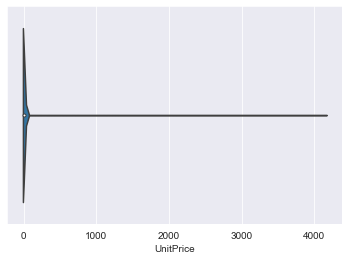

In [129]:
# unitPrice
sns.violinplot(x=df.UnitPrice)
plt.show()

In [138]:
df.loc[df.UnitPrice.sort_values(ascending = False)[:20].index, :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
28713,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536,France
28712,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536,France
27838,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744,Singapore
8832,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744,Singapore
27839,571751,M,Manual,1,2011-10-19 11:18:00,2118.74,12744,Singapore
8835,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744,Singapore
8834,548813,M,Manual,1,2011-04-04 13:03:00,1252.95,12744,Singapore
12253,554301,M,Manual,1,2011-05-23 14:46:00,1241.98,12757,Portugal
12245,554155,M,Manual,1,2011-05-23 11:26:00,1241.98,12757,Portugal
8861,548913,M,Manual,1,2011-04-05 09:45:00,1136.30,12669,France


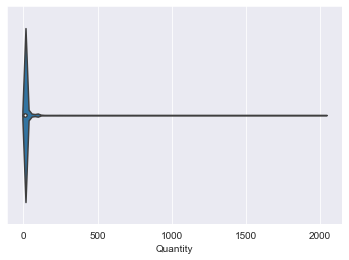

In [130]:
sns.violinplot(x = df.Quantity)
plt.show()

In [139]:
# quantity
df.loc[df.Quantity.sort_values(ascending = False)[:20].index, :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
33688,579498,23084,RABBIT NIGHT LIGHT,2040,2011-11-29 15:52:00,1.79,12798,Japan
804,537899,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1488,2010-12-09 10:44:00,2.55,12755,Japan
28466,572869,23084,RABBIT NIGHT LIGHT,960,2011-10-26 13:21:00,1.79,12798,Japan
28748,573153,23084,RABBIT NIGHT LIGHT,912,2011-10-28 07:39:00,1.79,12678,France
7306,546530,20975,12 PENCILS SMALL TUBE RED RETROSPOT,768,2011-03-14 13:25:00,0.65,17404,Sweden
22651,566494,23310,BUBBLEGUM RING ASSORTED,720,2011-09-13 11:12:00,0.42,17404,Sweden
18801,562285,15036,ASSORTED COLOURS SILK FAN,720,2011-08-04 10:45:00,0.72,17404,Sweden
11245,552978,15036,ASSORTED COLOURS SILK FAN,600,2011-05-12 14:46:00,0.65,12590,Germany
15016,557670,21918,SET 12 KIDS COLOUR CHALK STICKS,576,2011-06-22 10:11:00,0.36,12798,Japan
22643,566494,22492,MINI PAINT SET VINTAGE,576,2011-09-13 11:12:00,0.65,17404,Sweden


In [172]:
# create new feature - sales
df.loc[:, 'Sales'] = df.UnitPrice * df.Quantity

In [173]:
df.shape

(33698, 9)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33698 entries, 0 to 35115
Data columns (total 9 columns):
InvoiceNo      33698 non-null object
StockCode      33698 non-null object
Description    33698 non-null object
Quantity       33698 non-null int64
InvoiceDate    33698 non-null datetime64[ns]
UnitPrice      33698 non-null float64
CustomerID     33698 non-null object
Country        33698 non-null object
Sales          33698 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 3.8+ MB


In [175]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583,France,15.6


In [181]:
df.to_csv('../data/cleaned_tx_df.csv', index = None)

In [176]:
df.dtypes.to_dict()

{'InvoiceNo': dtype('O'),
 'StockCode': dtype('O'),
 'Description': dtype('O'),
 'Quantity': dtype('int64'),
 'InvoiceDate': dtype('<M8[ns]'),
 'UnitPrice': dtype('float64'),
 'CustomerID': dtype('O'),
 'Country': dtype('O'),
 'Sales': dtype('float64')}

In [177]:
dtypes = {'InvoiceNo': str,
         'StockCode': str,
         'Description': str,
         'Quantity': 'int64',
         'UnitPrice': 'float64',
         'CustomerID': str,
         'Country': str,
          'Sales': 'float64'
            }


In [184]:
cleaned_tx_df = pd.read_csv('../data/cleaned_tx_df.csv', dtype = dtypes, parse_dates = ['InvoiceDate'], float_precision = 'round_trip')

In [185]:
(cleaned_tx_df == df.reset_index(drop = True)).all()

InvoiceNo      True
StockCode      True
Description    True
Quantity       True
InvoiceDate    True
UnitPrice      True
CustomerID     True
Country        True
Sales          True
dtype: bool